In [152]:
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,plot_confusion_matrix, confusion_matrix

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.random_projection import GaussianRandomProjection

clusterings = ['k-means','EM']
dimReductions = ['PCA','ICA', 'RP', 'NMF']
thisDR = 'RP'

In [89]:
###### E-coli 
### http://archive.ics.uci.edu/ml/datasets/Ecoli
# data = pd.read_csv('datafiles/ecoli.csv')))  # very unbalanced
# class_names = np.array(['cp', 'im', 'imL', 'imS', 'imU','om','omL','pp'])
data = pd.read_csv('datafiles/ecoli-balance.csv') # balanced: merged sub-species of E-coli
class_names = np.array(['cp', 'im', 'om','pp'])
y_data = data.Y
x_data = data.loc[:,'X1':'X7']

In [90]:
one_hot = OneHotEncoder()

y_data_hot = one_hot.fit_transform(y_data.values.reshape(-1, 1)).todense()
# y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()
y_data_hot.shape

(336, 4)

In [91]:

le = LabelEncoder()
le.fit(y_data.values.tolist())
y_data_le = le.transform(y_data)
y_data_le.shape

(336,)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_le, train_size=0.7, random_state=my_random_state, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(235, 7) (101, 7) (235,) (101,)


In [93]:
x_train

,X1,X2,X3,X4,X5,X6,X7
25,0.29,0.37,0.48,0.5,0.48,0.44,0.52
11,0.25,0.48,0.48,0.5,0.44,0.17,0.29
316,0.64,0.66,0.48,0.5,0.41,0.39,0.20
176,0.66,0.53,0.48,0.5,0.59,0.66,0.66
173,0.45,0.40,0.48,0.5,0.61,0.74,0.77
...,...,...,...,...,...,...,...
293,0.63,1.00,0.48,0.5,0.35,0.51,0.49
217,0.61,0.47,0.48,0.5,0.00,0.80,0.32
226,0.83,0.48,0.48,0.5,0.65,0.76,0.79
112,0.35,0.34,0.48,0.5,0.46,0.30,0.27


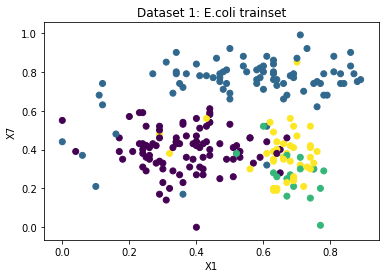

In [94]:
# X1&X6, X1&X7 shows visually good split
plt.scatter(x_train.X1,x_train.X7, c=y_train, cmap='viridis')
# plt.scatter(x_data.X1, x_data.X7, c = y_data_le, cmap = 'viridis')
# plt.colorbar();  # show color scale
plt.title('Dataset 1: E.coli trainset')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig('ecoli_X1_X7_train.png')
plt.show()

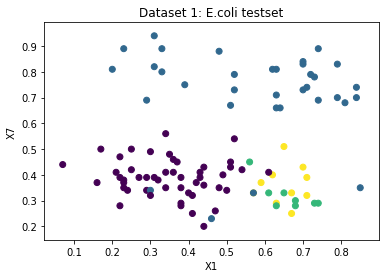

In [95]:
plt.scatter(x_test.X1,x_test.X7, c=y_test, cmap='viridis')
# plt.scatter(x_data.X1, x_data.X7, c = y_data_le, cmap = 'viridis')
# plt.colorbar();  # show color scale
plt.title('Dataset 1: E.coli testset')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig('ecoli_X1_X7_test.png')
plt.show()

# 2.1 Dimensionality Reduction: RP

In [96]:
DR = GaussianRandomProjection(n_components = 4, 
             random_state = my_random_state)

tic = time.perf_counter() 
DR.fit(x_train)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

x_train_transform = DR.fit_transform(x_train)
x_train_inverse = np.linalg.pinv(DR.components_.T)
x_train_reconstruct = x_train_transform.dot(x_train_inverse)
x_train_reconstruct

training time 0.000993900000139547 seconds



array([[ 0.48993648, -0.01366473,  0.14580018, ...,  0.27460578,
         0.01358964,  0.58786759],
       [ 0.41606488,  0.16941976,  0.10815421, ...,  0.2864282 ,
        -0.12750633,  0.37873302],
       [ 0.83631072,  0.2788523 ,  0.06236725, ...,  0.22132925,
        -0.02534057,  0.2860171 ],
       ...,
       [ 1.07849138, -0.0088767 ,  0.18931159, ...,  0.37185598,
         0.14950089,  0.83028953],
       [ 0.51341175,  0.03017824,  0.10617074, ...,  0.30903728,
        -0.00832363,  0.35546428],
       [ 0.4126305 ,  0.10244246,  0.11071355, ...,  0.20639831,
        -0.05304094,  0.46330327]])

In [97]:
x_train.values

array([[0.29, 0.37, 0.48, ..., 0.48, 0.44, 0.52],
       [0.25, 0.48, 0.48, ..., 0.44, 0.17, 0.29],
       [0.64, 0.66, 0.48, ..., 0.41, 0.39, 0.2 ],
       ...,
       [0.83, 0.48, 0.48, ..., 0.65, 0.76, 0.79],
       [0.35, 0.34, 0.48, ..., 0.46, 0.3 , 0.27],
       [0.24, 0.43, 0.48, ..., 0.37, 0.28, 0.38]])

In [98]:
DR.components_

array([[-0.88396388,  0.47968279, -0.36591546, -0.22269215, -0.6839661 ,
        -0.22918096, -1.38766044],
       [-0.60896798,  0.89621219,  0.04106753, -0.12953424, -0.56706527,
        -0.61030855,  0.70238465],
       [ 0.11228407, -0.33668362,  0.14315679,  0.1919868 , -0.18663476,
         0.28924281,  0.92316434],
       [-0.26403695, -0.75704738,  0.17940814, -0.01910384,  0.78467193,
         0.07211333,  0.09003546]])

training time 0.0007145999998101615 seconds
[-0.50066708]

training time 0.0007476000000679051 seconds
[-0.50066708 -1.30576885]

training time 0.000558699999601231 seconds
[-0.50066708 -1.30576885  0.06939527]

training time 0.0008713999995961785 seconds
[-0.50066708 -1.30576885  0.06939527 -0.06237916]

training time 0.0009272999996028375 seconds
[-0.50066708 -1.30576885  0.06939527 -0.06237916 -1.06137524]

training time 0.0009415999993507285 seconds
[-0.50066708 -1.30576885  0.06939527 -0.06237916 -1.06137524 -1.05424889]

training time 0.0007703000001129112 seconds
[-0.50066708 -1.30576885  0.06939527 -0.06237916 -1.06137524 -1.05424889
 -0.89681858]



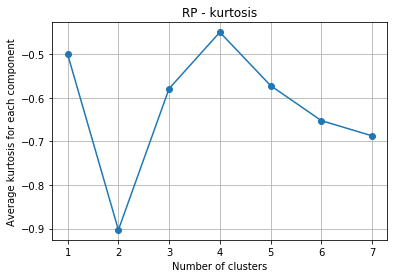

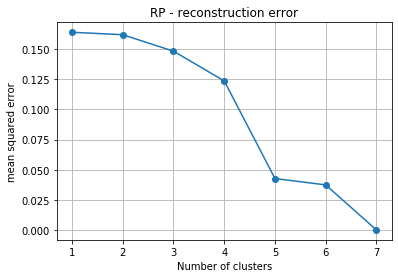

In [99]:
# Kurtosis & Reconstruction Error
numfeatures = x_train.shape[1]
# numfeatures = 16
kurtosis_all = []
mse_all = []
for i in range(1, 1+numfeatures):
    DR = GaussianRandomProjection(n_components = i, random_state = my_random_state)
    
    tic = time.perf_counter() 
    DR.fit(x_train)
    toc = time.perf_counter() 
    print(f"training time {toc - tic} seconds")
    
    kurt = kurtosis(DR.components_.T)
#     print(DR.components_)
    print(kurt)
    kurtosis_all.append(np.mean(kurt))
    
    x_train_transform = DR.fit_transform(x_train)
    x_train_inverse = np.linalg.pinv(DR.components_.T)
    x_train_reconstruct = x_train_transform.dot(x_train_inverse)
    mse = np.sum(np.square(x_train.values - x_train_reconstruct))/x_train_reconstruct.size
    mse_all.append(mse)
#     x_test_transform = DR.fit_transform(x_test)
#     x_train_inverse = DR.inverse_transform(x_train_transform)
    print()

plt.figure()
plt.plot(range(1,1+numfeatures), kurtosis_all, marker = 'o')
plt.title('RP - kurtosis')
plt.xlabel('Number of clusters')
plt.ylabel('Average kurtosis for each component')
plt.grid()
plt.savefig('part2/rp_kurtosis.png')
plt.show()


plt.figure()
plt.plot(range(1,1+numfeatures), mse_all, marker = 'o')
plt.title('RP - reconstruction error')
plt.xlabel('Number of clusters')
plt.ylabel('mean squared error')
plt.grid()
plt.savefig('part2/rp_mse.png')
plt.show()

In [100]:
# 5 component is best (relatively min MSE)
best_n_components = 5
bestDR = GaussianRandomProjection(n_components=best_n_components, random_state = my_random_state)
x_train_transform = bestDR.fit_transform(x_train)
x_test_transform = bestDR.fit_transform(x_test)

x_train_inverse = np.linalg.pinv(bestDR.components_.T)
x_train_reconstruct = x_train_transform.dot(x_train_inverse)
# Reconstruction Error
mse = np.sum(np.square(x_train.values - x_train_reconstruct))/x_train_reconstruct.size
print('MSE: ', mse)
#  MSE:  0.04266261920459053 for n=5

MSE:  0.04266261920459053


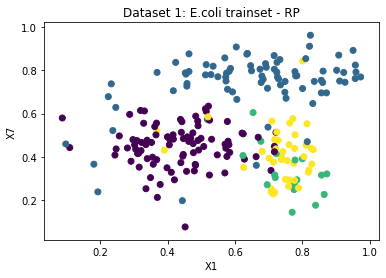

In [101]:
plt.scatter(x_train_reconstruct[:,0],x_train_reconstruct[:,6], c=y_train, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title('Dataset 1: E.coli trainset - RP')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig('part2/ecoli_X1_X7_reconstruct.png')
plt.show()

# 2.1.1. after dimensional reduction: KMeans

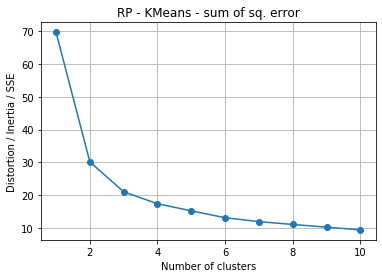

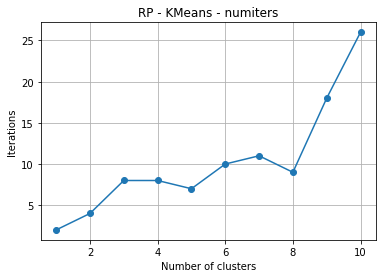

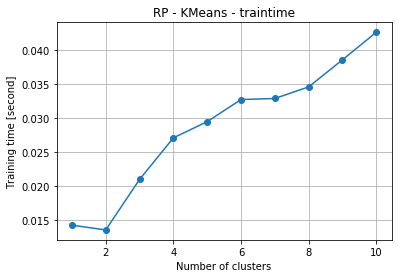

In [102]:
# calculate distortion for a range of number of cluster
distortions = []
numiters = []
traintime = []
nclusters_range = range(1, 11)
for i in nclusters_range:
    km = KMeans(n_clusters=i, 
                random_state=my_random_state)
    
    tic = time.perf_counter() 
    km.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    print()
    
    distortions.append(km.inertia_)
    numiters.append(km.n_iter_)

# plot
plt.figure()
plt.plot(nclusters_range, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion / Inertia / SSE')
plt.title('RP - KMeans - sum of sq. error')
plt.grid()
plt.savefig('part2/RP_KMeans_distortion.png')
plt.show()


# plot
plt.figure()
plt.plot(nclusters_range, numiters, marker='o')
plt.title('RP - KMeans - numiters')
plt.xlabel('Number of clusters')
plt.ylabel('Iterations')
plt.grid()
plt.savefig('part2/RP_KMeans_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(nclusters_range, traintime, marker='o')
plt.title('RP - KMeans - traintime')
plt.xlabel('Number of clusters')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig('part2/RP_KMeans_traintime.png')
plt.show()

## n=4

In [103]:
# the best n_clusters determined to be 4 (same as the original labeling)
km4 = KMeans(n_clusters = 4, random_state = my_random_state)


tic = time.perf_counter() 
km4.fit(x_train_transform)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km4.cluster_centers_)
print(km4.labels_)
print(km4.inertia_)
print(km4.n_iter_)

training time 0.029480299999704584 seconds

[[-1.45613846 -0.17047777  0.46362755  0.05946028  0.83376168]
 [-1.99882704 -0.18176389  0.81177118  0.09536662  1.00864683]
 [-1.22845359 -0.08782826  0.31425858 -0.20909927  1.09949064]
 [-1.12660966 -0.05910195  0.36086957  0.08972146  0.60639575]]
[0 3 2 1 1 3 2 0 1 0 3 1 2 0 1 0 3 3 1 3 3 3 3 3 1 3 0 0 0 3 0 1 1 1 0 1 3
 0 0 0 2 2 2 1 1 0 0 3 0 3 3 3 1 1 3 3 1 1 3 0 2 3 1 0 0 3 3 0 0 3 0 0 0 3
 2 1 2 2 3 0 0 0 0 0 3 0 0 3 2 1 0 3 2 3 3 2 1 1 3 0 1 0 1 0 1 0 1 2 3 1 0
 2 0 3 0 1 3 1 2 2 3 1 2 1 3 0 3 1 2 1 2 1 2 0 1 0 1 1 0 1 3 2 3 0 1 1 1 1
 3 1 3 3 3 2 3 3 3 2 1 2 1 2 3 3 1 2 0 3 0 2 3 2 3 2 1 3 1 1 1 2 1 1 3 3 1
 1 2 1 2 3 3 3 3 0 1 3 3 1 1 3 1 2 0 1 3 1 3 0 2 0 2 3 1 1 2 2 1 1 3 0 1 1
 0 1 2 0 1 1 3 3 2 2 1 3 3]
17.39427383248238
8


[[65  0 27  2]
 [ 3 69  7  3]
 [ 0  1 10  6]
 [ 2  1  9 30]]
Prediction accuracy on train set: 0.7404255319148936


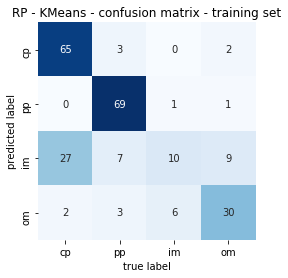

In [104]:
# species = ['cp','pp','im','om']
species = ['om','im','pp','cp']
x_train_km4 = []
for l in km4.labels_:
    x_train_km4.append(species[l])


# train_confmat_km4 = confusion_matrix(one_hot.inverse_transform(y_train), x_train_km4)
# train_accu_km4 = accuracy_score(one_hot.inverse_transform(y_train), x_train_km4)
train_confmat_km4 = confusion_matrix(le.inverse_transform(y_train), x_train_km4)
train_accu_km4 = accuracy_score(le.inverse_transform(y_train), x_train_km4)
print(train_confmat_km4)

print(f"Prediction accuracy on train set: {train_accu_km4}")

species.reverse() # for plotting
sns.heatmap(train_confmat_km4.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title('RP - KMeans - confusion matrix - training set')
plt.savefig('part2/RP_KMeans_confusion_train.png')


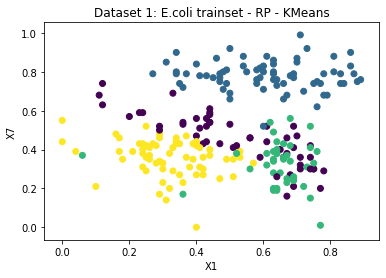

In [118]:
plt.scatter(x_train.X1,x_train.X7, c=km4.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title('Dataset 1: E.coli trainset - RP - KMeans')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig('part2/RP_KMeans_scatter_train4.png')
plt.show()

In [106]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km4.inertia_)
score = silhouette_score(x_train_transform, km4.labels_)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_train).reshape(-1), x_train_km4)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), x_train_km4)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  17.39427383248238
Silhouette score:  0.36913463353841525
Adjusted Mutual Information (AMI) score:  0.5099776545180492


testing time 0.0006111000002420042 seconds

[[42  0  7  0]
 [ 1 29  2  2]
 [ 0  0  5  3]
 [ 0  0  2  8]]
Prediction accuracy on test set: 0.8316831683168316


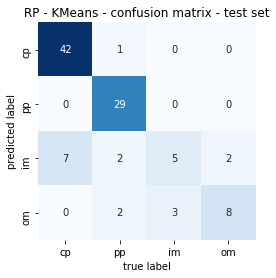

In [117]:


tic = time.perf_counter() 
y_test_predict4 = km4.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

species = ['om','im','pp','cp']

y_test_km4 = []
for pred in y_test_predict4:
    y_test_km4.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(one_hot.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


# test_confmat_km4 = confusion_matrix(one_hot.inverse_transform(y_test), y_test_km4)
# test_accu_km4 = accuracy_score(one_hot.inverse_transform(y_test), y_test_km4)
test_confmat_km4 = confusion_matrix(le.inverse_transform(y_test), y_test_km4)
test_accu_km4 = accuracy_score(le.inverse_transform(y_test), y_test_km4)
print(test_confmat_km4)
print(f"Prediction accuracy on test set: {test_accu_km4}")


species.reverse() # for plotting
sns.heatmap(test_confmat_km4.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title('RP - KMeans - confusion matrix - test set')
plt.savefig('part2/RP_KMeans_confusion_test.png')

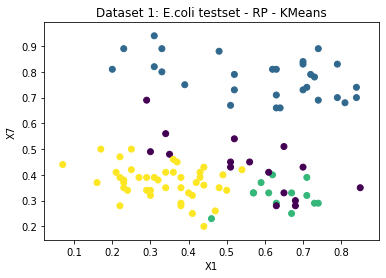

In [119]:
plt.scatter(x_test.X1,x_test.X7, c=y_test_predict4, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title('Dataset 1: E.coli testset - RP - KMeans')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig('part2/RP_KMeans_scatter_test4.png')
plt.show()

In [37]:
# Evaluate quality of clusters
print('test set')
score = silhouette_score(x_test_transform, y_test_predict4)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_test).reshape(-1), y_test_km4)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_km4)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.38693515515905536
Adjusted Mutual Information (AMI) score:  0.6312667774935246


## n=5

In [115]:
best_n_clusters = 5
km = KMeans(n_clusters = best_n_clusters, random_state = my_random_state)


tic = time.perf_counter() 
km.fit(x_train_transform)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km.cluster_centers_)
print(km.labels_)
print(km.inertia_)
print(km.n_iter_)

training time 0.03302270000040153 seconds

[[-1.41728145 -0.32140553  0.33054445 -0.00876721  0.99245961]
 [-1.99882704 -0.18176389  0.81177118  0.09536662  1.00864683]
 [-1.38152397 -0.07864031  0.49587828  0.08567903  0.71716631]
 [-1.22754419 -0.039521    0.32640698 -0.2442758   1.11495115]
 [-1.07870437 -0.05246452  0.33456243  0.09032098  0.59530015]]
[2 4 3 1 1 4 3 2 1 0 4 1 3 0 1 2 2 2 1 4 2 4 4 4 1 4 2 2 2 4 0 1 1 1 0 1 4
 0 0 2 3 3 0 1 1 2 0 4 0 4 2 2 1 1 2 4 1 1 4 2 3 4 1 0 0 4 4 0 0 2 0 2 2 4
 3 1 3 3 2 2 0 2 2 2 4 0 2 4 3 1 2 4 3 4 2 3 1 1 4 2 1 2 1 2 1 2 1 3 2 1 2
 3 2 4 0 1 4 1 3 3 4 1 3 1 4 0 2 1 3 1 3 1 0 2 1 0 1 1 2 1 4 3 2 2 1 1 1 1
 4 1 4 4 4 0 4 4 4 0 1 0 1 3 2 4 1 4 0 4 2 3 2 3 2 3 1 4 1 1 1 3 1 1 4 4 1
 1 3 1 0 2 4 2 4 2 1 4 4 1 1 4 1 3 2 1 2 1 4 2 3 2 0 4 1 1 3 3 1 1 4 2 1 1
 0 1 3 2 1 1 4 4 3 3 1 4 4]
15.222173722316523
7


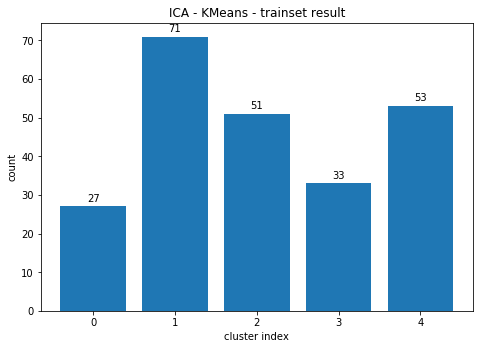

In [116]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in km.labels_:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts)
plt.title('RP - KMeans - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig('part2/RP_Kmeans_train.png')

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


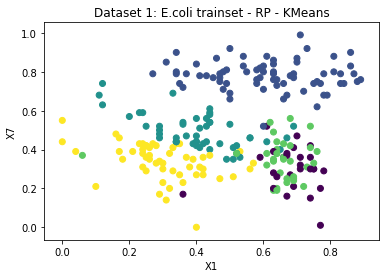

In [120]:
plt.scatter(x_train.X1,x_train.X7, c=km.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title('Dataset 1: E.coli trainset - RP - KMeans')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig('part2/RP_KMeans_scatter_train.png')
plt.show()

In [121]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km.inertia_)
score = silhouette_score(x_train_transform, km.labels_)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_train).reshape(-1), km.labels_)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), km.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  15.222173722316523
Silhouette score:  0.36230065670579087
Adjusted Mutual Information (AMI) score:  0.5423215866604135


In [122]:


tic = time.perf_counter() 
y_test_predict = km.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.0009988000001612818 seconds



array([1, 1, 3, 1, 4, 2, 3, 0, 1, 2, 1, 3, 1, 2, 4, 2, 4, 3, 1, 4, 4, 4,
       2, 1, 1, 1, 1, 0, 4, 1, 2, 2, 4, 2, 1, 1, 3, 4, 1, 1, 3, 1, 1, 4,
       3, 4, 4, 2, 4, 2, 1, 2, 4, 4, 1, 1, 4, 2, 2, 3, 4, 0, 0, 3, 4, 4,
       1, 2, 2, 0, 1, 4, 4, 4, 4, 4, 2, 0, 4, 2, 1, 4, 3, 3, 4, 1, 2, 2,
       4, 4, 2, 1, 4, 1, 4, 0, 4, 1, 1, 3, 4])

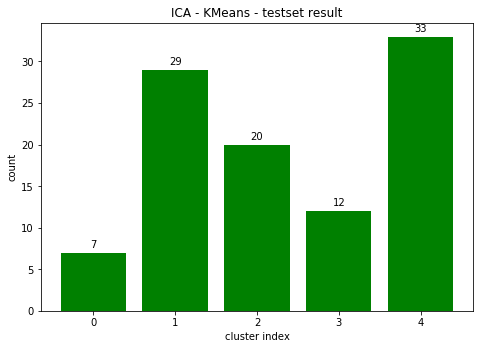

In [123]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title('ICA - KMeans - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig('part2/ICA_Kmeans_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


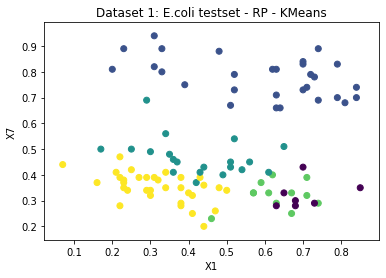

In [124]:
plt.scatter(x_test.X1,x_test.X7, c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title('Dataset 1: E.coli testset - RP - KMeans')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig('part2/RP_KMeans_scatter_test.png')
plt.show()

In [47]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(one_hot.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
# ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.3403748539184802
Adjusted Mutual Information (AMI) score:  0.6099785473900604


# 2.1.1. after dimensional reduction: Expectation Maximization (EM)

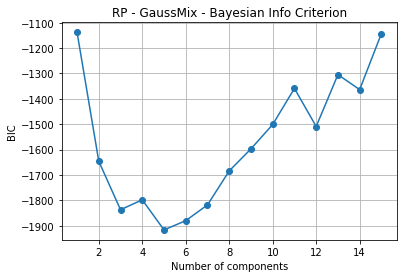

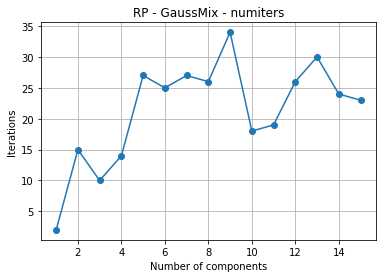

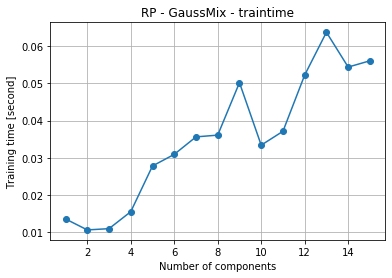

In [125]:
# Find the optimal number of components using BIC
n_components_grid = np.arange(1, 16)
# bic = np.zeros(n_components_grid.size)
bic = []
numiters = []
traintime = []

# for idx, n_components in enumerate(n_components_grid):
for n_components in n_components_grid:
    gm = GaussianMixture(n_components=n_components, random_state=my_random_state)
    
    tic = time.perf_counter() 
    gm.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    numiters.append(gm.n_iter_)
    bic.append(gm.bic(x_train_transform))
#     bic[idx] = gm.bic(x_train)
print()


# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid, bic, marker='o')
# plt.xticks(k_grid)
plt.title('RP - GaussMix - Bayesian Info Criterion')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.grid()
plt.savefig('part2/RP_gm_bic.png')

# plot
plt.figure()
plt.plot(n_components_grid, numiters, marker='o')
plt.title('RP - GaussMix - numiters')
plt.xlabel('Number of components')
plt.ylabel('Iterations')
plt.grid()
plt.savefig('part2/RP_gm_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(n_components_grid, traintime, marker='o')
plt.title('RP - GaussMix - traintime')
plt.xlabel('Number of components')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig('part2/RP_gm_traintime.png')
plt.show()

## best_n_component = 4

In [134]:
# the best n_clusters determined to be 4 (same as the original labeling)
best_n_component = 4
gm4 = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm4.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict4 = gm4.predict(x_train_transform)
y_train_predict4

training time 0.01686520000021119 seconds



array([3, 3, 2, 1, 1, 3, 0, 3, 1, 0, 3, 1, 2, 0, 1, 3, 3, 2, 1, 3, 3, 3,
       2, 3, 1, 3, 3, 3, 3, 3, 0, 1, 1, 1, 0, 0, 3, 0, 0, 3, 2, 2, 2, 1,
       1, 3, 0, 2, 0, 3, 3, 2, 1, 1, 3, 3, 1, 1, 3, 3, 2, 2, 1, 0, 0, 2,
       3, 0, 0, 3, 0, 3, 3, 3, 2, 1, 0, 2, 3, 2, 0, 3, 3, 3, 3, 0, 3, 2,
       2, 1, 3, 3, 2, 3, 3, 2, 1, 1, 2, 3, 1, 3, 1, 1, 1, 3, 1, 2, 3, 1,
       1, 2, 3, 2, 0, 1, 3, 1, 2, 2, 3, 1, 2, 1, 3, 0, 3, 1, 2, 1, 0, 1,
       0, 3, 1, 2, 1, 0, 3, 1, 3, 2, 3, 3, 1, 1, 1, 1, 3, 1, 2, 3, 3, 2,
       3, 3, 3, 0, 1, 2, 1, 2, 3, 3, 1, 2, 0, 3, 3, 2, 3, 2, 3, 2, 1, 3,
       1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 1,
       1, 2, 1, 0, 3, 1, 3, 1, 3, 1, 2, 3, 0, 3, 1, 1, 2, 2, 1, 1, 3, 3,
       1, 1, 0, 1, 0, 3, 1, 1, 2, 3, 2, 2, 1, 2, 3], dtype=int64)

[[78  0  0 16]
 [ 3 70  4  5]
 [ 0  0 16  1]
 [ 4  1 11 26]]
Prediction accuracy on train set: 0.8085106382978723


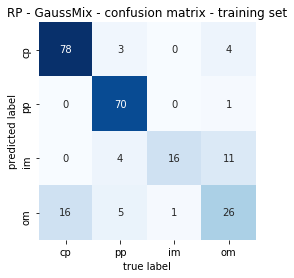

In [135]:
# species = ['cp','pp','im','om']
species = ['om','im','pp','cp']
y_train_gm4 = []
for l in y_train_predict4:
    y_train_gm4.append(species[l])


# train_confmat_gm4 = confusion_matrix(one_hot.inverse_transform(y_train), y_train_gm4)
# train_accu_gm4 = accuracy_score(one_hot.inverse_transform(y_train), y_train_gm4)
train_confmat_gm4 = confusion_matrix(le.inverse_transform(y_train), y_train_gm4)
train_accu_gm4 = accuracy_score(le.inverse_transform(y_train), y_train_gm4)
print(train_confmat_gm4)

print(f"Prediction accuracy on train set: {train_accu_gm4}")

species.reverse() # for plotting
sns.heatmap(train_confmat_gm4.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title('RP - GaussMix - confusion matrix - training set')
plt.savefig('part2/RP_gm_confusion_train.png')


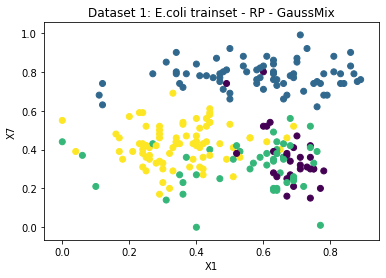

In [136]:

plt.scatter(x_train.X1,x_train.X7, c=y_train_predict4, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - GaussMix')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_gm_scatter_train4.png')
plt.show()

In [137]:
# Evaluate quality of clusters
print('training set')
# print('Inertia: ', km4.inertia_)
score = silhouette_score(x_train_transform, y_train_predict4)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict4)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Silhouette score:  0.31384799629623783
Adjusted Mutual Information (AMI) score:  0.5813857547547363


In [138]:

tic = time.perf_counter() 
y_test_predict4 = gm4.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict4

testing time 0.0005656000003000372 seconds



array([1, 0, 2, 1, 3, 3, 2, 0, 1, 3, 1, 2, 0, 3, 3, 3, 3, 2, 1, 2, 2, 3,
       3, 1, 1, 1, 1, 0, 3, 0, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 1, 1, 3,
       2, 3, 3, 3, 3, 3, 1, 0, 3, 3, 1, 1, 3, 0, 3, 2, 3, 0, 0, 2, 3, 2,
       1, 3, 3, 0, 1, 3, 3, 3, 3, 2, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 2, 3,
       3, 2, 3, 1, 3, 1, 2, 0, 3, 1, 1, 2, 3], dtype=int64)

[[43  0  0  6]
 [ 0 26  5  3]
 [ 0  0  6  2]
 [ 0  0  2  8]]
Prediction accuracy on test set: 0.8217821782178217


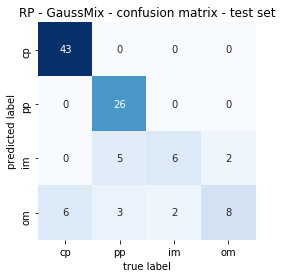

In [139]:


species = ['om','im','pp','cp']
y_test_gm4 = []
for pred in y_test_predict4:
    y_test_gm4.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(one_hot.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


# test_confmat_gm4 = confusion_matrix(one_hot.inverse_transform(y_test), y_test_gm4)
# test_accu_gm4 = accuracy_score(one_hot.inverse_transform(y_test), y_test_gm4)
test_confmat_gm4 = confusion_matrix(le.inverse_transform(y_test), y_test_gm4)
test_accu_gm4 = accuracy_score(le.inverse_transform(y_test), y_test_gm4)
print(test_confmat_gm4)
print(f"Prediction accuracy on test set: {test_accu_gm4}")


species.reverse() # for plotting
sns.heatmap(test_confmat_gm4.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title('RP - GaussMix - confusion matrix - test set')
plt.savefig('part2/RP_gm_confusion_test.png')

In [142]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(one_hot.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict4)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict4)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.302196360980837
Adjusted Mutual Information (AMI) score:  0.6247693073147211


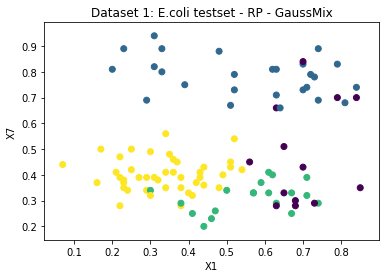

In [141]:

plt.scatter(x_test.X1,x_test.X7, c=y_test_predict4, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - GaussMix')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_gm_scatter_test4.png')
plt.show()

# best_n_component = 5

In [143]:
best_n_component = 5
gm = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict = gm.predict(x_train_transform)
y_train_predict

training time 0.019902200000615267 seconds



array([3, 3, 0, 0, 4, 3, 0, 3, 4, 0, 3, 4, 0, 0, 4, 4, 3, 2, 4, 3, 3, 3,
       2, 3, 4, 3, 3, 3, 3, 3, 0, 4, 4, 4, 0, 1, 3, 0, 0, 0, 0, 0, 2, 0,
       4, 3, 0, 2, 0, 3, 3, 2, 4, 4, 3, 3, 4, 4, 3, 3, 0, 2, 4, 0, 0, 2,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 4, 0, 0, 3, 2, 0, 3, 3, 3, 3, 0, 3, 2,
       0, 4, 3, 3, 0, 3, 3, 0, 4, 4, 2, 3, 4, 3, 1, 4, 4, 3, 4, 0, 3, 1,
       4, 0, 3, 2, 0, 4, 3, 4, 0, 0, 3, 1, 0, 4, 3, 0, 3, 1, 0, 4, 0, 1,
       0, 3, 4, 0, 4, 1, 3, 4, 3, 0, 3, 3, 4, 4, 4, 4, 3, 1, 2, 3, 3, 0,
       3, 3, 3, 0, 4, 0, 4, 2, 3, 3, 4, 2, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3,
       4, 4, 4, 0, 4, 4, 3, 2, 4, 4, 0, 4, 0, 3, 3, 3, 3, 3, 1, 3, 3, 4,
       4, 2, 4, 0, 3, 4, 3, 4, 3, 1, 0, 3, 0, 3, 4, 4, 0, 0, 4, 4, 3, 3,
       4, 4, 0, 4, 0, 3, 1, 4, 2, 3, 0, 2, 4, 2, 3], dtype=int64)

In [144]:
# Evaluate quality of clusters
print('training set')
score = silhouette_score(x_train_transform, y_train_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict)
# ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_train).reshape(-1), y_train_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)
# print(f"Prediction accuracy on train set: {accuracy_score(one_hot.inverse_transform(y_train),y_train_predict)}")

training set
Silhouette score:  0.13434744472407367
Adjusted Mutual Information (AMI) score:  0.5789620798153945


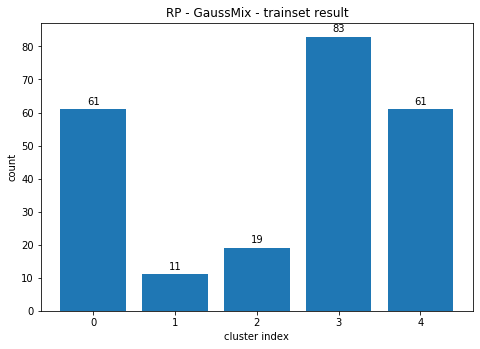

In [145]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for yp in y_train_predict:
    counts[yp] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices,counts)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.title('RP - GaussMix - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig('part2/RP_gm_train.png')
plt.show()

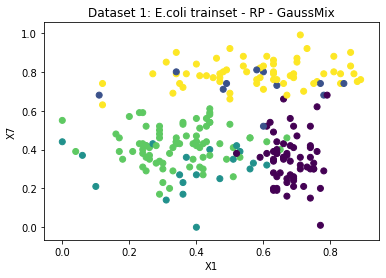

In [146]:
plt.scatter(x_train.X1,x_train.X7, c=y_train_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title('Dataset 1: E.coli trainset - RP - GaussMix')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig('part2/RP_gm_scatter_train.png')
plt.show()

In [148]:


tic = time.perf_counter() 
y_test_predict = gm.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.0009145000003627501 seconds



array([4, 1, 0, 4, 3, 3, 0, 0, 4, 3, 4, 0, 0, 3, 3, 3, 3, 0, 4, 2, 2, 3,
       3, 4, 1, 4, 4, 0, 3, 0, 3, 4, 3, 3, 4, 4, 0, 3, 4, 4, 0, 4, 4, 3,
       0, 3, 3, 3, 3, 3, 1, 0, 3, 3, 4, 4, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3,
       4, 3, 3, 0, 4, 3, 3, 3, 3, 2, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 0, 3,
       3, 2, 3, 4, 3, 0, 2, 0, 3, 4, 4, 0, 3], dtype=int64)

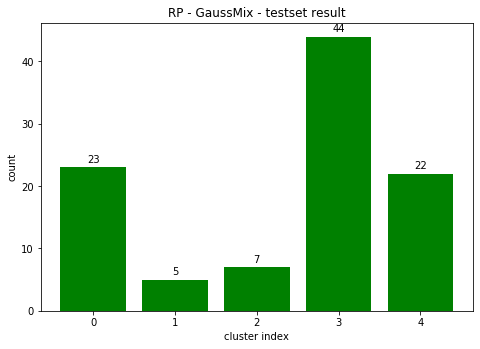

In [149]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title('RP - GaussMix - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig('part2/RP_gm_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


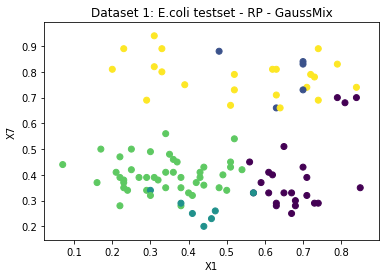

In [150]:
plt.scatter(x_test.X1,x_test.X7, c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title('Dataset 1: E.coli testset - RP - GaussMix')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig('part2/RP_gm_scatter_test.png')
plt.show()

In [151]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(one_hot.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_test).reshape(-1), y_test_predict)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.10078742112511521
Adjusted Mutual Information (AMI) score:  0.6448121265001139


# 没用的

In [ ]:
species = ['om','pp','im','cp']
y_train_gm = []
for l in y_train_predict:
    y_train_gm.append(species[l])


train_confmat_gm = confusion_matrix(one_hot.inverse_transform(y_train), y_train_gm)
train_accu_gm = accuracy_score(one_hot.inverse_transform(y_train), y_train_gm)
print(train_confmat_gm)

print(f"Prediction accuracy on train set: {train_accu_gm}")


species.reverse() # for plotting
sns.heatmap(train_confmat_gm.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title('initial clustering - GaussMix - confusion matrix - training set')
plt.savefig('part1/initial_gm_confusion_train.png')


In [ ]:

# plot
plt.figure()
plt.hist(y_train_predict, bins = best_n_component)
plt.title('initial clustering - GaussMix - result')
plt.xlabel('cluster #')
plt.ylabel('count')
# plt.grid()
plt.savefig('part1/initial_gm_result.png')
plt.show()



In [ ]:

plt.figure()
plt.hist(km3.labels_, bins=np.arange(0, best_n_clusters + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, best_n_clusters))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.grid()
plt.title('PCA - KMeans - train set')
plt.savefig('part2/PCA_Kmeans_train.png')